<a href="https://colab.research.google.com/github/YoshifumiMiyagi/PECARN-Group1-/blob/main/PECARN_Group_1_clustering_vol_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [404]:
SEED = 42
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# CSVファイルを読み込む
df = pd.read_csv('/content/TBI PUD 10-08-2013.csv')
# 使用された説明変数とCTスキャンの必要性を示す目的変数をリストにする

variables_of_interest = [
#    'AgeTwoPlus',         # 年齢
    'High_impact_InjSev', # 外傷の重症度
    'LOCSeparate',        # 意識喪失の履歴
    'LocLen',             # 意識喪失の持続時間
#    'HA_verb',            # 頭痛の有無
#    'HASeverity',         # 頭痛の重症度
    'Vomit',              # 嘔吐の履歴
    'VomitNbr',           # 嘔吐の回数
    'ActNorm',            # 保護者の観察
#    'GCSTotal',           # GCSスコア
    'AMS',                # 精神状態の変化
    'SFxBas',             # 基底頭蓋骨骨折の兆候
    'SFxPalp',            # 触知可能な頭蓋骨骨折
    'Hema',               # 頭皮血腫
    'HemaLoc',            # 頭皮血腫の位置
#    'HospHeadPosCT',      # 目的変数（CTスキャンと2日以上の入院の必要性）
#    'PosCT'               # 目的変数（CTスキャンの必要性）
]

variables_of_numeric = [
    'GCSTotal',           # GCSスコア
    'AgeInMonth',         # 月齢
    'AgeinYears',         # 年
]
# 説明変数を抽出
df_selected = df[variables_of_interest]

In [405]:
Dat = df_selected.copy()
#Dat["AgeTwoPlus"] = Dat["AgeTwoPlus"].replace({1: 0, 2: 1})
Dat['High_impact_InjSev'] = Dat['High_impact_InjSev'].replace({1: 0, 2: 1, 3:2})
Dat['LocLen'] = Dat['LocLen'].replace({92: np.nan, 1:0, 2: 1, 3: 2, 4: 3})
#Dat['HA_verb'] = Dat['HA_verb'].replace({91: np.nan})
#Dat['HASeverity'] = Dat['HASeverity'].replace({92: np.nan, 1:0, 2: 1, 3:2})
Dat['VomitNbr'] = Dat['VomitNbr'].replace({92:np.nan, 1: 0, 2: 1, 3: 2})
Dat['HemaLoc'] = Dat['HemaLoc'].replace({92:np.nan, 1: 0, 2: 1, 3: 2})

# 対象を頭皮血腫と嘔吐をみとめている頭部外傷児(2063例)に限定する

In [406]:
Dat2 = Dat[(Dat['Hema']==1)&(Dat['Vomit']==1)]
Dat2.isnull().sum()

,0
High_impact_InjSev,32
LOCSeparate,130
LocLen,1849
Vomit,0
VomitNbr,100
ActNorm,124
AMS,12
SFxBas,12
SFxPalp,1
Hema,0


In [407]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df2 = pd.DataFrame(np.round(imputer.fit_transform(Dat2)))
df2.columns = Dat2.columns

In [408]:
# 数が3以上のカテゴリカル変数のリスト
categorical_variables = [
    'High_impact_InjSev',
    'LOCSeparate',
    'LocLen',
    # 'HA_verb',
    #'HASeverity',
    'VomitNbr',
    'SFxPalp',
    'HemaLoc',
#    'PosCT'
]

In [409]:
for col in df2.columns:
  if col not in categorical_variables:
     df2[col] = df2[col].astype(bool)

In [410]:
df_selected_onehot = pd.get_dummies(df2, columns = categorical_variables)
df_selected_onehot

,Vomit,ActNorm,AMS,SFxBas,Hema,High_impact_InjSev_0.0,High_impact_InjSev_1.0,High_impact_InjSev_2.0,LOCSeparate_0.0,LOCSeparate_1.0,...,LocLen_3.0,VomitNbr_0.0,VomitNbr_1.0,VomitNbr_2.0,SFxPalp_0.0,SFxPalp_1.0,SFxPalp_2.0,HemaLoc_0.0,HemaLoc_1.0,HemaLoc_2.0
0,True,False,True,False,True,False,True,False,True,False,...,False,True,False,False,True,False,False,True,False,False
1,True,True,True,False,True,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
2,True,True,False,False,True,False,True,False,True,False,...,False,False,False,True,True,False,False,True,False,False
3,True,True,False,False,True,False,True,False,True,False,...,False,True,False,False,True,False,False,False,True,False
4,True,True,False,False,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,True,True,False,False,True,False,True,False,True,False,...,False,False,True,False,True,False,False,True,False,False
2059,True,True,False,False,True,False,True,False,True,False,...,False,False,True,False,True,False,False,True,False,False
2060,True,False,True,False,True,False,True,False,True,False,...,False,False,False,True,True,False,False,False,False,True
2061,True,False,False,False,True,False,True,False,True,False,...,False,False,False,True,True,False,False,False,False,True


In [411]:
!pip install kmodes

In [412]:
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
k = 2

categorical_data = df_selected_onehot

kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=-1,random_state=SEED)
#kmodes = KModes(n_clusters=k, init='Cao', n_init=5, verbose=1,random_state=SEED)
clusters = kmodes.fit_predict(categorical_data)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_data).toarray()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 269, cost: 8789.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 325, cost: 9622.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 177, cost: 8776.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 279, cost: 8883.0
Run 4, iteration: 2/100, moves: 180, cost: 8862.0
Run 4, iteration: 3/100, moves: 23, cost: 8862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 9471.0
Best run was number 3


In [413]:
pca = PCA(n_components=k,random_state=0)
reduced_data = pca.fit_transform(encoded_data)

pca_explained_variance = pca.explained_variance_ratio_
print("PCA Explained Variance:", pca_explained_variance)

PCA Explained Variance: [0.16188765 0.13106165]


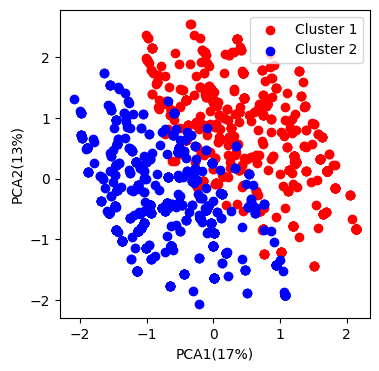

In [414]:
plt.figure(figsize=(4, 4))
colors = ['r', 'b','g','pink','orange','yellow']
for cluster in range(k):
    points = reduced_data[clusters == cluster]
    plt.scatter(points[:, 0], points[:, 1], c=colors[cluster], label=f'Cluster {cluster+1}')

plt.xlabel('PCA1(17%)')
plt.ylabel('PCA2(13%)')
plt.legend()
#plt.savefig('Figure1.png',format="png", dpi=600)
plt.show()

In [415]:
df3 = df2.copy()
df3['cluster'] = clusters
df3['GCSTotal'] = df['GCSTotal']
df3['AgeInMonth'] = df['AgeInMonth']
df3['AgeinYears'] = df['AgeinYears']

df2.shape, df3.shape

((2063, 11), (2063, 15))

In [416]:
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

Cluster 0: n = 926
Cluster 1: n = 1137


In [417]:
from matplotlib.colors import ListedColormap

# 定性カラーマップの作成
CMAP2 = ListedColormap(['pink', 'red'])
CMAP3 = ListedColormap(['pink', 'orange', 'red'])
CMAP4 = ListedColormap(['pink', 'orange', 'red','purple'])

In [418]:
cols2 = [
    #'HA_verb',
    'LOCSeparate','ActNorm','AMS','SFxBas','SFxPalp']
cols3 = ['High_impact_InjSev', 'HASeverity','VomitNbr','HemaLoc']
cols4 = ['LocLen']


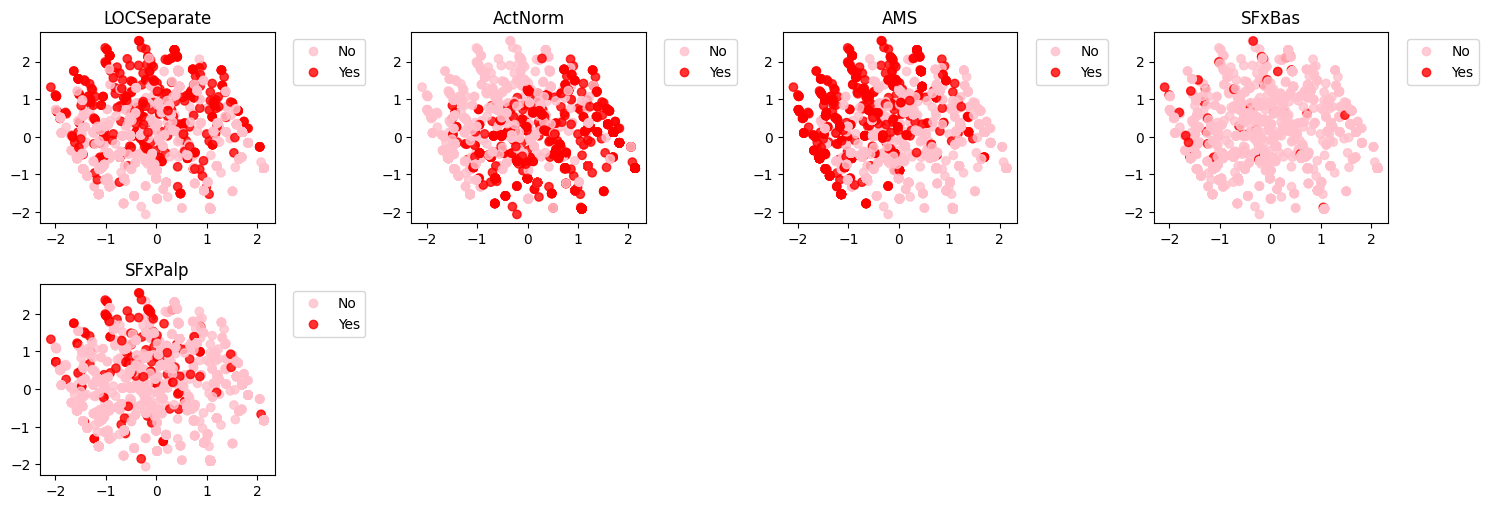

In [419]:
embedding = reduced_data

fig = plt.figure(figsize=(15,10))
for i, col in enumerate(cols2):
    ax = fig.add_subplot(4, 4, i+1, title=col)

    dat[col] = dat[col].fillna(0)
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1],
        c=dat[col], cmap=CMAP2, alpha=0.8)

    handles, labels = scatter.legend_elements()
    plt.legend(handles=handles,
                labels=['No', 'Yes'],

                bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.show()

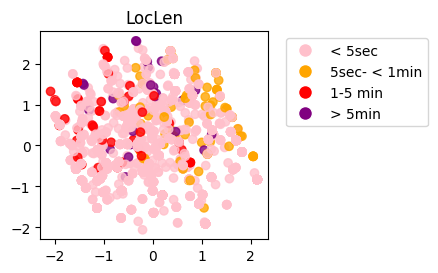

In [420]:
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(cols4):
    ax = fig.add_subplot(4, 4, i+1, title=col)

    dat[col] = dat[col].fillna(0)
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1],
        c=dat[col], cmap=CMAP4, alpha=0.8)

        # 凡例を手動で設定
    legend_labels = ['< 5sec', '5sec- < 1min', '1-5 min', '> 5min']
    colors = ['pink', 'orange', 'red','purple']  # 各カテゴリの色を明示的に指定

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in colors]

    plt.legend(handles=handles,
                labels=legend_labels,
                #title="LocLen",
                bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.show()

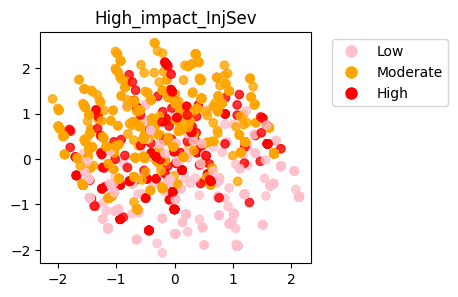

In [421]:
# High_impact_InjSevのplot
plt.figure(figsize=(3.5, 3))
dat['High_impact_InjSev'] = dat['High_impact_InjSev'].fillna(0)
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
              c=dat['High_impact_InjSev'], cmap=CMAP3, alpha=0.8)
    # 凡例を手動で設定
legend_labels = ['Low', 'Moderate', 'High']
colors = ['pink', 'orange', 'red']  # 各カテゴリの色を明示的に指定

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in colors]
plt.legend(handles=handles,
                labels=legend_labels,
               # title="LocLen",
                bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('High_impact_InjSev')
plt.show()


In [422]:
# # HASeverityのplot
# plt.figure(figsize=(3.5, 3))
# dat['HASeverity'] = dat['HASeverity'].fillna(0)
# scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
#               c=dat['HASeverity'], cmap=CMAP3, alpha=0.8)
#     # 凡例を手動で設定
# legend_labels = ['Mild', 'Moderate', 'Severe']
# colors = ['pink', 'orange', 'red']  # 各カテゴリの色を明示的に指定

# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
#                for color in colors]
# plt.legend(handles=handles,
#                 labels=legend_labels,
#                # title="LocLen",
#                 bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('HASeverity')
# plt.show()

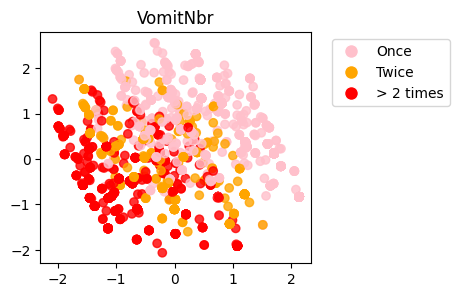

In [423]:
# VomitNbrのplot
plt.figure(figsize=(3.5, 3))
dat['VomitNbr'] = dat['VomitNbr'].fillna(0)
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
              c=dat['VomitNbr'], cmap=CMAP3, alpha=0.8)
    # 凡例を手動で設定
legend_labels = ['Once', 'Twice', '> 2 times']
colors = ['pink', 'orange', 'red']  # 各カテゴリの色を明示的に指定

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in colors]
plt.legend(handles=handles,
                labels=legend_labels,
               # title="LocLen",
                bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('VomitNbr')
plt.show()

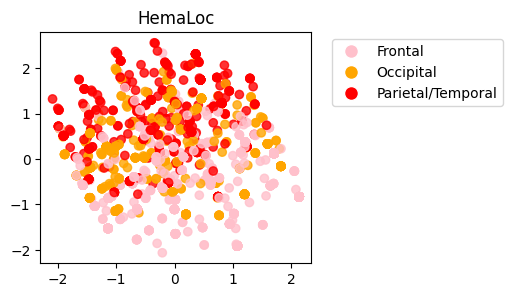

In [424]:
# HemaLocのplot
plt.figure(figsize=(3.5, 3))
dat['HemaLoc'] = dat['HemaLoc'].fillna(0)
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
              c=dat['HemaLoc'], cmap=CMAP3, alpha=0.8)
    # 凡例を手動で設定
legend_labels = ['Frontal', 'Occipital', 'Parietal/Temporal']
colors = ['pink', 'orange', 'red']  # 各カテゴリの色を明示的に指定

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in colors]
plt.legend(handles=handles,
                labels=legend_labels,
               # title="LocLen",
                bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('HemaLoc')
plt.show()

In [425]:
 import scipy.stats as stats

# グループごとにデータを分割
group1 = df3['GCSTotal'][df3['cluster'] == 0]
group2 = df3['GCSTotal'][df3['cluster'] == 1]

# t検定の実行
t_stat, p_val = stats.ttest_ind(group1, group2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')


T-statistic: 1.8522720640575752
P-value: 0.06412966231171359


In [426]:
group1 = df3['AgeInMonth'][df3['cluster'] == 0]
group2 = df3['AgeInMonth'][df3['cluster'] == 1]

# t検定の実行
t_stat, p_val = stats.ttest_ind(group1, group2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: 0.1221583477077337
P-value: 0.902785522481973


In [427]:
Surgery = df[(Dat['Hema']==1)&(Dat['Vomit']==1)]['Neurosurgery']
CT = df[(Dat['Hema']==1)&(Dat['Vomit']==1)]['PosCT'].replace({92: np.nan})

In [428]:
df4 = Dat2.copy()
df4['Surgery'] = Surgery.values
df4['CT'] = CT.values
df4['Cluster'] = clusters
df4.isnull().sum()

,0
High_impact_InjSev,32
LOCSeparate,130
LocLen,1849
Vomit,0
VomitNbr,100
ActNorm,124
AMS,12
SFxBas,12
SFxPalp,1
Hema,0


In [444]:
import pandas as pd
#from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
# Crosstableの作成
crosstable = pd.crosstab(df4['Surgery'], df4['Cluster'])
print(crosstable)

# Fisher検定の実行
#oddsratio, p_value = fisher_exact(crosstable)

# print(f'Odds Ratio: {oddsratio}')
# print(f'P-value: {p_value}')
# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

Cluster    0     1
Surgery           
0.0      914  1120
1.0       12    17
Chi-square statistic: 0.037783357688442806
P-value: 0.8458788055328618
Degrees of freedom: 1
Expected frequencies:
[[ 912.98303442 1121.01696558]
 [  13.01696558   15.98303442]]


In [430]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crosstableの作成
crosstable = pd.crosstab(df4['CT'],df4['Cluster'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

Cluster    0    1
CT               
0.0      477  812
1.0      106   84
Chi-square statistic: 23.686481104479725
P-value: 1.1337616652159428e-06
Degrees of freedom: 1
Expected frequencies:
[[508.10480054 780.89519946]
 [ 74.89519946 115.10480054]]


In [431]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crosstableの作成
crosstable = pd.crosstab(df4['Cluster'], df4['LOCSeparate'].replace({2: np.nan}))
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

LOCSeparate  0.0  1.0
Cluster              
0            670  144
1            900  108
Chi-square statistic: 17.808499364726142
P-value: 2.44289560771294e-05
Degrees of freedom: 1
Expected frequencies:
[[701.41602634 112.58397366]
 [868.58397366 139.41602634]]


In [432]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crosstableの作成
crosstable = pd.crosstab(df4['Cluster'], df4['High_impact_InjSev'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')


High_impact_InjSev  0.0  1.0  2.0
Cluster                          
0                   240  548  129
1                   289  651  174
Chi-square statistic: 0.9709414334393589
P-value: 0.6154074460001231
Degrees of freedom: 2
Expected frequencies:
[[238.84441162 541.35056622 136.80502216]
 [290.15558838 657.64943378 166.19497784]]


In [433]:
# Crosstableの作成
crosstable = pd.crosstab(df4['Cluster'], df4['LocLen'].replace({92: np.nan}))
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

LocLen   0.0  1.0  2.0  3.0
Cluster                    
0         20   76   11   17
1         26    9   47    8
Chi-square statistic: 75.68787384486126
P-value: 2.580290388661033e-16
Degrees of freedom: 3
Expected frequencies:
[[26.65420561 49.25233645 33.60747664 14.48598131]
 [19.34579439 35.74766355 24.39252336 10.51401869]]


In [434]:
# # Crosstableの作成
# crosstable = pd.crosstab(df3['cluster'], df3['HA_verb'])
# print(crosstable)

# # カイ二乗検定の実行
# chi2, p_value, dof, expected = chi2_contingency(crosstable)

# print(f'Chi-square statistic: {chi2}')
# print(f'P-value: {p_value}')
# print(f'Degrees of freedom: {dof}')
# print(f'Expected frequencies:\n{expected}')

In [435]:
# # Crosstableの作成
# crosstable = pd.crosstab(df3['cluster'], df3['HASeverity'])
# print(crosstable)

# # カイ二乗検定の実行
# chi2, p_value, dof, expected = chi2_contingency(crosstable)

# print(f'Chi-square statistic: {chi2}')
# print(f'P-value: {p_value}')
# print(f'Degrees of freedom: {dof}')
# print(f'Expected frequencies:\n{expected}')

In [436]:
# Crosstableの作成
crosstable = pd.crosstab(df4['Cluster'], df4['VomitNbr'].replace({92: np.nan}))
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

VomitNbr  0.0  1.0  2.0
Cluster                
0         720   97   56
1         134  266  690
Chi-square statistic: 1007.927304410548
P-value: 1.3532148886616528e-219
Degrees of freedom: 2
Expected frequencies:
[[379.79724911 161.43606724 331.76668365]
 [474.20275089 201.56393276 414.23331635]]


In [437]:
# Crosstableの作成
crosstable = pd.crosstab(df4['Cluster'], df4['ActNorm'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

ActNorm  0.0  1.0
Cluster          
0        289  558
1        498  594
Chi-square statistic: 25.61393947244322
P-value: 4.170159988205291e-07
Degrees of freedom: 1
Expected frequencies:
[[343.77978339 503.22021661]
 [443.22021661 648.77978339]]


In [438]:
# Crosstableの作成
crosstable = pd.crosstab(df4['Cluster'], df4['AMS'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

AMS      0.0  1.0
Cluster          
0        657  265
1        677  452
Chi-square statistic: 27.97482593152047
P-value: 1.229039817579966e-07
Degrees of freedom: 1
Expected frequencies:
[[599.68210629 322.31789371]
 [734.31789371 394.68210629]]


In [439]:
# Crosstableの作成
crosstable = pd.crosstab(df4['Cluster'], df4['SFxBas'])
print(crosstable)

# Fisher検定の実行
oddsratio, p_value = fisher_exact(crosstable)

print(f'Odds Ratio: {oddsratio}')
print(f'P-value: {p_value}')

SFxBas    0.0  1.0
Cluster           
0         900   20
1        1109   22
Odds Ratio: 0.8926961226330027
P-value: 0.755297803040163


In [443]:
# Crosstableの作成
crosstable = pd.crosstab(df4['Cluster'], df4['SFxPalp'].replace({2: np.nan}))
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

SFxPalp   0.0  1.0
Cluster           
0         849   21
1        1078   10
Chi-square statistic: 6.005189634978815
P-value: 0.01426386089439322
Degrees of freedom: 1
Expected frequencies:
[[ 856.22574055   13.77425945]
 [1070.77425945   17.22574055]]


In [441]:
# Crosstableの作成
crosstable = pd.crosstab(df4['Cluster'], df4['HemaLoc'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

HemaLoc  0.0  1.0  2.0
Cluster               
0        299  270  341
1        635  258  233
Chi-square statistic: 119.90093084196687
P-value: 9.201183249452116e-27
Degrees of freedom: 2
Expected frequencies:
[[417.45579568 235.99214145 256.55206287]
 [516.54420432 292.00785855 317.44793713]]
